In [13]:
# Problem statement:
# Development of a predictive model based on Multilayer perceptron (with 3 hidden layers) on Wheat seeds dataset to predict the output class
# And evaluating the model on training and test data 
# No. of observations = 210
# Dimension of feature vector = 7
# No. of output classes = 3 
# Web reference: https://machinelearningmastery.com/standard-machine-learning-datasets/

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Function to normalize the data in the range of [0,1]
def normalize(A):
    B = A
    d1 = A.shape[1]
    min1 = []
    max1 = []
    range1 = []
    for i in range(d1):
        temp = A[:,i]
        min1.append(np.amin(temp))
        max1.append(np.amax(temp))
        range1.append(max1[i]-min1[i])
        B[:,i] = (A[:,i]-min1[i])/range1[i]
        
    return B


# Sigmoid function definition
def sigmoid(x):
    y = x
    for i in range(len(x)):
        temp = 1/(1+np.exp(-x[i]))
        y[i] = temp
    return y


# Softmax function definition
def softmax(x):
    y = x
    e_sum = 0
    for i in range(len(x)):
        e_sum = e_sum + np.exp(x[i])
    for i in range(len(x)):
        temp = np.exp(x[i])
        y[i] = temp/e_sum
    return y


# Function to predict the class based on the output node values
def pred_class(x):
    temp = np.amax(x)
    for i in range(len(x)):
        if x[i] == temp:
            return i+1
    

# Reading the raw data from the table
MD = pd.read_table("D:\IITG\ML Lab\Assignments\Assignment-8\seeds_dataset.txt",sep='\t',header=None)
SD = MD.to_numpy()
n = SD.shape[0]

# Training data percentage
p = 0.8

# Learning rate
alpha = 1*1e-3

# No. of training data and test data
n_tr = int(p*n)
n_te = n - n_tr

# ones = np.ones((n,1))
# SD = np.concatenate((ones,SD),axis=1)


# Shuffle the data to randomly split into training and test data
np.random.shuffle(SD)

# No. of nodes in input layer
m1 = SD.shape[1]-1

# No. of noes in the 3 hidden layers
m2 = 7
m3 = 5
m4 = 4

# No. of nodes in the output layer
m5 = int(np.amax(SD[:,m1])-np.amin(SD[:,m1])+1)
# w12 = 0.5*np.ones((m2,m1))
# w23 = 0.5*np.ones((m3,m2))
# w34 = 0.5*np.ones((m4,m3))
# w45 = 0.5*np.ones((m5,m4))

# Initialization of weights from input layer to hidden layer1 randomly
w12 = np.random.rand(m2,m1)

# Initialization of weights from hidden layer1 to hidden layer2 randomly
w23 = np.random.rand(m3,m2)

# Initialization of weights from hidden layer2 to hidden layer3 randomly
w34 = np.random.rand(m4,m3)

# Initialization of weights from hidden layer3 to output layer randomly
w45 = np.random.rand(m5,m4)

# Selecting training and test data from the shuffled data
DB_tr = SD[0:n_tr,:]
DB_te = SD[n_tr:,:]

# Normalizing the training data
NDB_tr = normalize(DB_tr[:,:m1])

app_col1 = DB_tr[:,m1].reshape(n_tr,1)
X_tr = NDB_tr[:,:]
X_tr = np.append(X_tr,app_col1,axis=1)


# Training the MLP via feed forward, back propogation and updating the weights
# No. of error predictions in each epoch
err_count = 0

# No. of epochs
epoch = 0


# batch = 20

# Repeat the learning process until the converge condition as mentioned below
while (err_count>50 or epoch==0) and epoch<500:
    # Initialization of delta vectors from hidden layers to output layer
    del2 = np.zeros(m2)
    del3 = np.zeros(m3)
    del4 = np.zeros(m4)
    del5 = np.zeros(m5)
    err_count = 0
    epoch+=1
    # Feed forward step on each training sample (from input layer to output layer)
    for t in range(n_tr):
        x1 = X_tr[t,:m1]
        x2 = sigmoid(np.matmul(w12,x1))
        x3 = sigmoid(np.matmul(w23,x2))
        x4 = sigmoid(np.matmul(w34,x3))
        x5_pred = sigmoid(np.matmul(w45,x4))
        # print(x5_pred)
        x5_act = np.zeros(m5)
        act_c = int(X_tr[t,m1])
        x5_act[act_c-1] = 1
        pred_c = pred_class(x5_pred)
        
    # Back propogation step on each training sample (if predicted class doesn't match with actual class)
        if pred_c!=act_c: #(t+1)%batch==0: 
            err_count+=1
            # for j in range(m5):
            #     del5[j] = x5_pred[j]*(1-x5_pred[j])*(x5_pred[j]-x5_act[j])
            # for i in range(m4):
            #     sum = 0
            #     for j in range(m5):
            #         sum += del5[j]*w45[j][i]
            #     del4[i] = x4[i]*(1-x4[i])*sum
            # for i in range(m3):
            #     sum = 0
            #     for j in range(m4):
            #         sum += del4[j]*w34[j][i]
            #     del3[i] = x3[i]*(1-x3[i])*sum
            # for i in range(m2):
            #     sum = 0
            #     for j in range(m3):
            #         sum += del3[j]*w23[j][i]
            #     del2[i] = x2[i]*(1-x2[i])*sum
         # Calculating the delta vectors between different layers for updating the weights       
            del5 = np.multiply(x5_pred,np.multiply(1-x5_pred,x5_pred-x5_act))
            del4 = np.multiply(x4,np.multiply(1-x4,np.matmul(w45.T,del5)))
            del3 = np.multiply(x3,np.multiply(1-x3,np.matmul(w34.T,del4)))
            del2 = np.multiply(x2,np.multiply(1-x2,np.matmul(w23.T,del3)))
         # Updating all the weights between different layers using the above values of delta  
            for i in range(w45.shape[0]):
                for j in range(w45.shape[1]):
                    w45[i][j] = w45[i][j] - (alpha*del5[i]*x4[j])
            for i in range(w34.shape[0]):
                for j in range(w34.shape[1]):
                    w34[i][j] = w34[i][j] - (alpha*del4[i]*x3[j])
            for i in range(w23.shape[0]):
                for j in range(w23.shape[1]):
                    w23[i][j] = w23[i][j] - (alpha*del3[i]*x2[j])
            for i in range(w12.shape[0]):
                for j in range(w12.shape[1]):
                    w12[i][j] = w12[i][j] - (alpha*del2[i]*x1[j])
    # print(err_count)


# Accuracy of MLP with respect to training data
acc_tr = round(100*(1-(err_count/n_tr)),2)    
print('The accuracy of MLP wrt training data is:',acc_tr,'%')

# Normalizing the test data for applying MLP            
NDB_te = normalize(DB_te[:,:m1])
app_col2 = DB_te[:,m1].reshape(n_te,1)
X_te = NDB_te[:,:]
X_te = np.append(X_te,app_col2,axis=1)
app_col3 = np.zeros((n_te,1))
X_te = np.append(X_te,app_col3,axis=1)
        
# Feed forward step on each test sample to predict the output class
for t in range(n_te):
    x1 = X_te[t,:m1]
    x2 = sigmoid(np.matmul(w12,x1))
    x3 = sigmoid(np.matmul(w23,x2))
    x4 = sigmoid(np.matmul(w34,x3))
    x5_pred = sigmoid(np.matmul(w45,x4))
    pred_c = pred_class(x5_pred)
    X_te[t,m1+1] = pred_c


# Evaluating the MLP for test data

# Initialization of confusion matrix
CM = np.zeros((m5,m5),dtype=int)


# Calculating the confusion matrix for test data
for i in range(n_te):
    temp1 = int(X_te[i,7]-1)
    temp2 = int(X_te[i,8]-1)
    CM[temp1,temp2] = CM[temp1,temp2] + 1

    
rows = ['Actual class1','Acutal class2','Actual class3']
cols = ['Predicted class1','Predicted class2','Predicted class3']
C = pd.DataFrame(CM,columns=cols,index=rows) 

print('Using MLP prediction, the confusion matrix for the testing data is:\n',C)


# Calculation of accuracy of MLP with respect to test data
acc_te = np.zeros(m5)
for i in range(m5):
     temp_sum = np.sum(CM[i,:]) 
     acc_te[i] = round(100*CM[i,i]/temp_sum,2)
     print('The prediction accuracy of MLP on testing data for class',i+1,'is',acc_te[i],'%')
    








The accuracy of MLP wrt training data is: 71.43 %
Using MLP prediction, the confusion matrix for the testing data is:
                Predicted class1  Predicted class2  Predicted class3
Actual class1                 9                 3                 1
Acutal class2                 0                15                 0
Actual class3                 2                 0                12
The prediction accuracy of MLP on testing data for class 1 is 69.23 %
The prediction accuracy of MLP on testing data for class 2 is 100.0 %
The prediction accuracy of MLP on testing data for class 3 is 85.71 %


With order of polynomial= 0 ,the Mean Absolute Percentage error of Regression,

for training data is 201.44 %

for testing data is 94.66 %

With order of polynomial= 1 ,the Mean Absolute Percentage error of Regression,

for training data is 71.25 %

for testing data is 45.05 %

With order of polynomial= 2 ,the Mean Absolute Percentage error of Regression,

for training data is 65.26 %

for testing data is 45.41 %

With order of polynomial= 3 ,the Mean Absolute Percentage error of Regression,

for training data is 59.94 %

for testing data is 47.09 %

With order of polynomial= 4 ,the Mean Absolute Percentage error of Regression,

for training data is 58.41 %

for testing data is 48.36 %

With order of polynomial= 5 ,the Mean Absolute Percentage error of Regression,

for training data is 56.68 %

for testing data is 55.09 %

With order of polynomial= 6 ,the Mean Absolute Percentage error of Regression,

for training data is 56.37 %

for testing data is 72.86 %

With order of polynomial= 

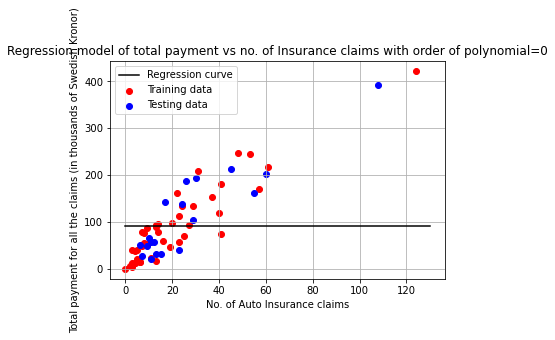

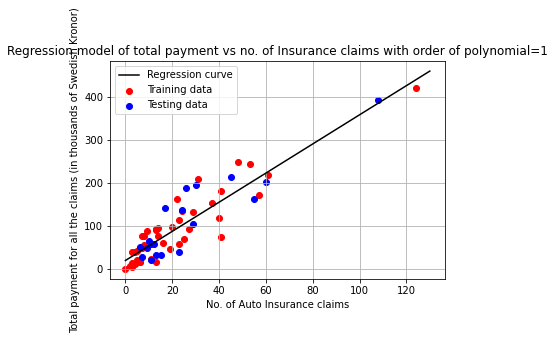

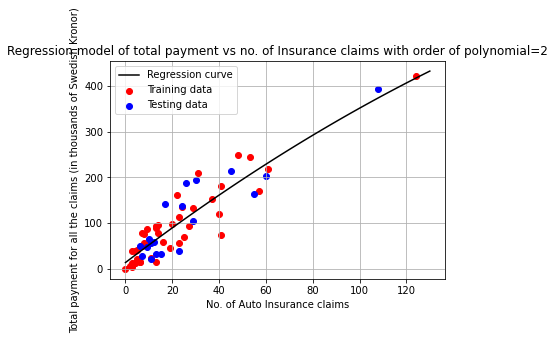

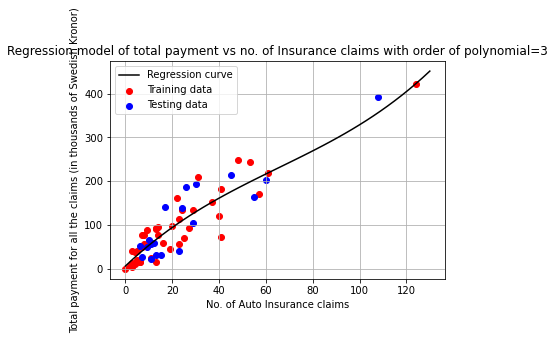

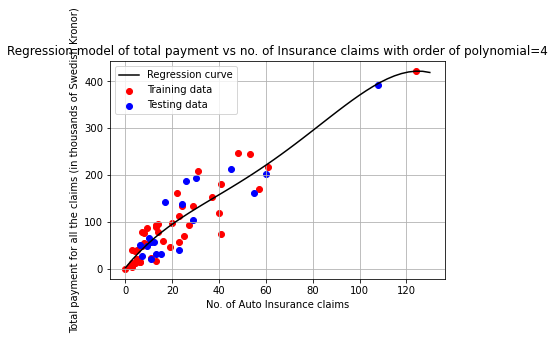

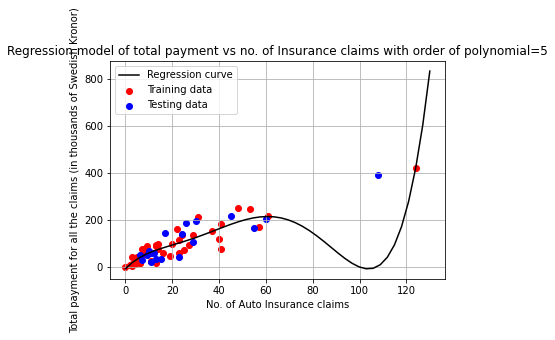

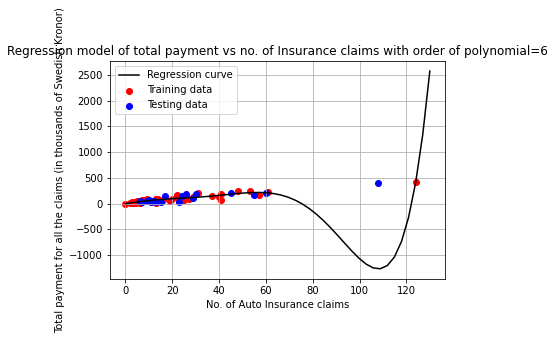

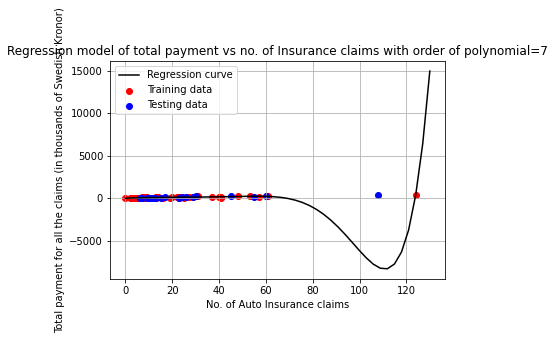

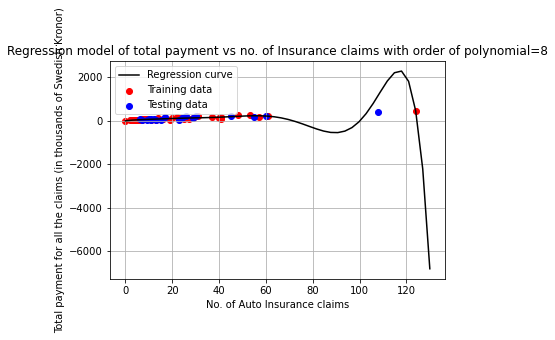

In [14]:
# Problem statement:
# Development of a predictive model based on regression for Auto Insurance claims dataset
# And evaluating the model on training and test data for different orders of polynomials 
# No. of observation = 63
# Dimension of feature vector = 1
# Web reference: https://machinelearningmastery.com/standard-machine-learning-datasets/



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Reading the raw data from text file
MD = pd.read_table("D:\IITG\ML Lab\Assignments\Assignment-8\Document.txt",sep='\t',header=0)
MD = MD.to_numpy()
SD = MD
MAPE_total = []

# Shuffling the data to randomly split into training and testing data
np.random.shuffle(SD)
n = SD.shape[0]
M = 8
p = 0.7
n_tr = int(p*n)
n_te = n-n_tr
DB_tr = SD[0:n_tr,:]
DB_te = SD[n_tr:,:]

# Input and target training and testing data
X_tr = DB_tr[:,0]
T_tr = DB_tr[:,1]
X_te = DB_te[:,0]
T_te = DB_te[:,1]


# Developing regression model for different orders of polynomial (i.e., m)
for m in range(M+1):
    phi = np.zeros((1,m+1))
    
# Evaluating the weight vector from the training data for different values of m   
    for i in range(n_tr):
        list1 = []
        for j in range(m+1):
            list1.append(X_tr[i]**j)
        list2 = np.array(list1).reshape(1,m+1)    
        phi = np.append(phi,list2,axis=0)
    phi = np.delete(phi,0,axis=0)
        
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),phi.T),T_tr)
    
    
# Calculation of Mean Absolute percentage Error for training data for different values of m
    
    Y_tr = []
    err = 0
    for i in range(n_tr):
        temp = 0
        for j in range(m+1):
            temp = temp + w[j]*((X_tr[i])**j)
        Y_tr.append(temp)
        if T_tr[i]!=0:
            err = err + abs((T_tr[i]-Y_tr[i])/T_tr[i])
    
    MAPE_tr = round((100/n_tr)*err,2)
    Y_tr = np.array(Y_tr)
    

# MAPE = (1/n)*sum(abs(y_act-y_pred)/y_act)*100    
# Calculation of Mean Absolute percentage Error for testing data for different values of m
    
    Y_te = []
    err = 0
    for i in range(n_te):
        temp = 0
        for j in range(m+1):
            temp = temp + w[j]*((X_te[i])**j)
        Y_te.append(temp)
        if T_te[i]!=0:
            err = err + abs((T_te[i]-Y_te[i])/T_te[i])
    
    MAPE_te = round((100/n_te)*err,2)
    Y_te = np.array(Y_te)


# Calculation of total Mean Absolute percentage Error for different values of m to evaluate the performance of models   
    MAPE_total.append(MAPE_tr+MAPE_te)
    
    
# Plotting the regression curve, training data and test data    
    N = 130
    x1 = np.linspace(0,N,n_tr)
    y1 = []
    for i in range(n_tr):
        temp2 = 0
        for j in range(m+1):
            temp2 = temp2 + w[j]*((x1[i])**j)
        y1.append(temp2)
    y1 = np.array(y1)
    fig = plt.figure()
    plt.plot(x1,y1,color='black',label='Regression curve')
    plt.scatter(X_tr,T_tr,color='red',label='Training data')
    plt.scatter(X_te,T_te,color='blue',label='Testing data')
    plt.legend()
    plt.xlabel('No. of Auto Insurance claims')
    plt.ylabel('Total payment for all the claims (in thousands of Swedish Kronor)')
    str1 = 'Regression model of total payment vs no. of Insurance claims with order of polynomial='
    str2 = str(m)
    str_t =  str1 + str2
    plt.title(str_t)
    plt.grid()  
    

# Displaying the Mean Absolute Percentage error for training and test data for different values of m    
    print('With order of polynomial=',m,',the Mean Absolute Percentage error of Regression,\n')
    print('for training data is',MAPE_tr,'%\n')
    print('for testing data is',MAPE_te,'%\n')
    

# Evaluating and deciding the best regression curve and corresponding order of polynomial
print('From the above plots, it is clear that the curve with order of polynomial=',MAPE_total.index(min(MAPE_total)),'best filts to both training and test data')